<div class="alert alert-info">

<center>
Работа студента 1 курса магистратуры МФТИ <br/> Котыги Майи Максимовны
</center>

# Tasks

|Id|Score  |Description  |Status  |
|--|:-----:|:------------|:------:|
|1 |2      |Продумать структуру базы данных <br> и отрисовать в редакторе| [✔️]    |
|2 |2      |Нормализовать базу данных (1НФ — 3НФ), описав, <br> к какой нормальной форме приводится таблица <br> и почему таблица в этой нормальной форме изначально не находилась| [✔️]    |
|3 |3      |Создать все таблицы в DBeaver, <br> указав первичные ключи к таблицам, <br> правильные типы данных, <br> могут ли поля быть пустыми или нет (использовать команду CREATE TABLE)| [✔️]    |
|4 |3      |Загрузить данные в таблицы в соответствии с созданной структурой <br> (использовать команду INSERT INTO или загрузить файлы, <br> используя возможности инструмента DBeaver; <br> в случае загрузки файлами приложить скрины, <br> что данные действительно были залиты) | [✔️]    |

In [1]:
#@title Библиотеки
!pip install python-dotenv >> install.txt

import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import psycopg2
from psycopg2 import sql

import os
from dotenv import load_dotenv

In [2]:
#@title Загрузка данных
!wget https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx

--2025-02-07 16:25:02--  https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx
Resolving lms.skillfactory.ru (lms.skillfactory.ru)... 178.248.236.121
Connecting to lms.skillfactory.ru (lms.skillfactory.ru)|178.248.236.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1827193 (1.7M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx’

asset-v1:SkillFacto 100%[===================>]   1.74M  2.37MB/s    in 0.7s    

2025-02-07 16:25:04 (2.37 MB/s) - ‘asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx’ saved [1827193/1827193]



# EDA

In [3]:
#@title Чтение данных

transaction = pd.read_excel('/content/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx', sheet_name='transaction')
customer = pd.read_excel('/content/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx', sheet_name='customer')

In [4]:
transaction.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82


In [5]:
customer.head(3)

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9


## Сводная информация

In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  object        
 5   order_status      20000 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 1.8+ MB


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            4000 non-null   int64 
 1   first_name             4000 non-null   object
 2   last_name              3875 non-null   object
 3   gender                 4000 non-null   object
 4   DOB                    3913 non-null   object
 5   job_title              3494 non-null   object
 6   job_industry_category  3344 non-null   object
 7   wealth_segment         4000 non-null   object
 8   deceased_indicator     4000 non-null   object
 9   owns_car               4000 non-null   object
 10  address                4000 non-null   object
 11  postcode               4000 non-null   int64 
 12  state                  4000 non-null   object
 13  country                4000 non-null   object
 14  property_valuation     4000 non-null   int64 
dtypes: int64(3), object(1

## Описание

In [8]:
transaction.describe()

,transaction_id,product_id,customer_id,transaction_date,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,20000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,1107.829449,556.046951
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,2091.470000,1759.850000
std,5773.647028,30.75359,1011.951046,NaN,582.825242,405.955660


In [9]:
transaction.describe(include=['object'])

,online_order,order_status,brand,product_line,product_class,product_size
count,19640,20000,19803,19803,19803,19803
unique,2,2,6,4,3,3
top,True,Approved,Solex,Standard,medium,medium
freq,9829,19821,4253,14176,13826,12990


In [10]:
transaction['online_order'].unique()

array([False, True, nan], dtype=object)

In [11]:
transaction['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [12]:
transaction['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [13]:
transaction['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [14]:
transaction['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [15]:
transaction['product_size'].unique()

array(['medium', 'large', 'small', nan], dtype=object)

In [16]:
transaction.isna().sum()

,0
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


In [17]:
customer.describe()

,customer_id,postcode,property_valuation
count,4000.000000,4000.000000,4000.000000
mean,2000.500000,2986.008500,7.515000
std,1154.844867,844.923724,2.824583
min,1.000000,2000.000000,1.000000
25%,1000.750000,2200.000000,6.000000
50%,2000.500000,2768.000000,8.000000
75%,3000.250000,3750.500000,10.000000
max,4000.000000,4883.000000,12.000000


In [18]:
customer.describe(include=['object'])

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,4000,3875,4000,3913,3494,3344,4000,4000,4000,4000,4000,4000
unique,3139,3725,6,3448,195,9,3,2,2,3996,5,1
top,Max,Pristnor,Female,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,613 Erie Lane,NSW,Australia
freq,5,3,2037,7,45,799,2000,3998,2024,2,2055,4000


In [19]:
customer.isna().sum()

,0
customer_id,0
first_name,0
last_name,125
gender,0
DOB,87
job_title,506
job_industry_category,656
wealth_segment,0
deceased_indicator,0
owns_car,0


6 гендеров? Прогрессивно

In [20]:
customer['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

Посмотрим, как можно упростить данные

In [21]:
customer['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [22]:
customer['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [23]:
unique_pairs = customer[['job_industry_category', 'wealth_segment']].drop_duplicates().reset_index(drop=True)

unique_pairs

,job_industry_category,wealth_segment
0,Health,Mass Customer
1,Financial Services,Mass Customer
2,Property,Mass Customer
3,IT,Mass Customer
4,NaN,Affluent Customer
5,Retail,High Net Worth
6,Financial Services,Affluent Customer
7,NaN,Mass Customer
8,Argiculture,Affluent Customer
9,Manufacturing,Mass Customer


Нужно делать 2 справочника по этим полям

## Краткие итоги

### Описание таблиц исходя из названия полей наполнения данными

*  transaction:

|id |parent_name     |description|Заметки на будущее|
|:-:|:---------------|:----------|:------|
|1  |transaction_id  |id транзакции|Первичный ключ, уникален, не null|
|2  |product_id      |id продукта|Внешний ключ, не null|
|3  |customer_id     |id покапателя|Внешний ключ, не null|
|4  |transaction_date|Дата транзакции|не null|
|5  |online_order    |Сделан ли заказ онлайн|Справочник|
|6  |order_status    |Статус заказа|Справочник|
|7  |brand           |Наименование марки|Справочник|
|8  |product_line    |Линейка продукта|Справочник|
|9  |product_class   |Класс продукта|Справочник|
|10 |product_size    |Размер продукта|Справочник|
|11 |list_price      |Цена по прейскуранту|Цена продукта|
|12 |standard_cost   |Цена без надбавок|Цена продукта|

* customer:

|id |parent_name          |description|Заметки на будущее|
|:-:|:-------------     --|:----------|:------|
|1  |customer_id          |id покапателя|Первичный ключ, уникален, не null|
|2  |first_name           |Имя покупателя|не null|
|3  |last_name            |Фамилия покупателя|не null|
|4  |gender               |Пол покупателя|не null|
|5  |DOB                  |Дата рождения|не null|
|6  |job_title            |Должность    ||
|7  |job_industry_category|Сфера деятельности||
|8  |wealth_segment       |Тип сегмента||
|9  |deceased_indicator   |Индикатор умершего клиента|не null|
|10 |owns_car             |Индикатор владения автомобилем||
|11 |address              |Адрес|Справочник, аналог ФИАС|
|12 |postcode             |Почтовый код|Справочник, аналог ФИАС|
|13 |state                |Штат/регион|Справочник, аналог ФИАС|
|14 |country              |Страна     |Справочник, аналог ФИАС|
|15 |property_valuation   |Оценка недвижимости||

В заметках, в некоторых полях, проставлена пометка "не null" напротив атрибутов, которые уже сейчас имеют пропуски. В реализации базы данных в таких случаях это ограничение будет снято ради сохранения бОльшего объема данных для соблюдения целостности. Но в будущем каждый такой кейс надо рассматривать индивидуально и решать проблему неполноты данных.


# Задание 1

```sql
// Use DBML to define your database structure
// Docs: https://dbml.dbdiagram.io/docs

Table Product {
    id serial [pk, increment]
    product_id integer [not null]
    brand_id integer
    product_line_id integer
    product_class_id integer
    product_size_id integer
    list_price decimal(10,2) [not null]
    standard_cost decimal(10,2)
    is_delete bool [not null]
    delete_reason text
    update_date timestamp [default: 'now()']
}

Table Person {
    id serial [pk, increment]
    first_name varchar(100) [not null]
    last_name varchar(100)
    address_id integer [not null]
    gender_id integer [not null]
    birth_date date
    is_dead bool [not null]
    is_car_owner bool [not null]
    job_position_id integer
    segment_id integer
    industry_id integer
    is_delete bool [not null]
    delete_reason text
    update_date timestamp [not null, default: 'now()']
}
Table Transaction{
    id serial [pk, increment]
    product_id integer [not null]
    customer_id integer [not null]
    transaction_date timestamp [not null]
    order_type_id integer
    order_status_id integer [not null]
    is_delete bool [not null]
    delete_reason text
    update_date timestamp [not null, default: 'now()']
}

Table ref_address{
    id serial [pk, increment]
    postcode integer [not null]
    region varchar(100) [not null]
    country varchar(70) [not null]
    address varchar(100) [not null]
    property_valuation integer [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool
    delete_reason text
    version integer [not null]
    old_id integer [not null]
    Indexes {
    (postcode, country, region, address, version, old_id) [unique, name: 'address_book']
  }
}

Table ref_prod_line {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_prod_class {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_prod_size {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_gender {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_job_position {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_segment {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_industry {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_order_type {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_order_status {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Table ref_brand {
    id serial [pk, increment]
    name varchar(30) [not null]
    create_time timestamp [not null, default: 'now()']
    delete_time timestamp
    is_delete bool [not null]
    delete_reason text
    version integer [not null]
    old_id integer [not null]
}

Ref: Product.product_id < Transaction.product_id
Ref: Person.id < Transaction.customer_id
Ref: ref_order_type.id < Transaction.order_type_id
Ref: ref_order_status.id < Transaction.order_status_id
Ref: ref_prod_line.id < Product.product_line_id
Ref: ref_prod_class.id < Product.product_class_id
Ref: ref_prod_size.id < Product.product_size_id
Ref: ref_brand.id < Product.brand_id
Ref: ref_gender.id < Person.gender_id
Ref: ref_address.id < Person.address_id
Ref: ref_job_position.id < Person.job_position_id
Ref: ref_industry.id < Person.industry_id
Ref: ref_segment.id < Person.segment_id
```
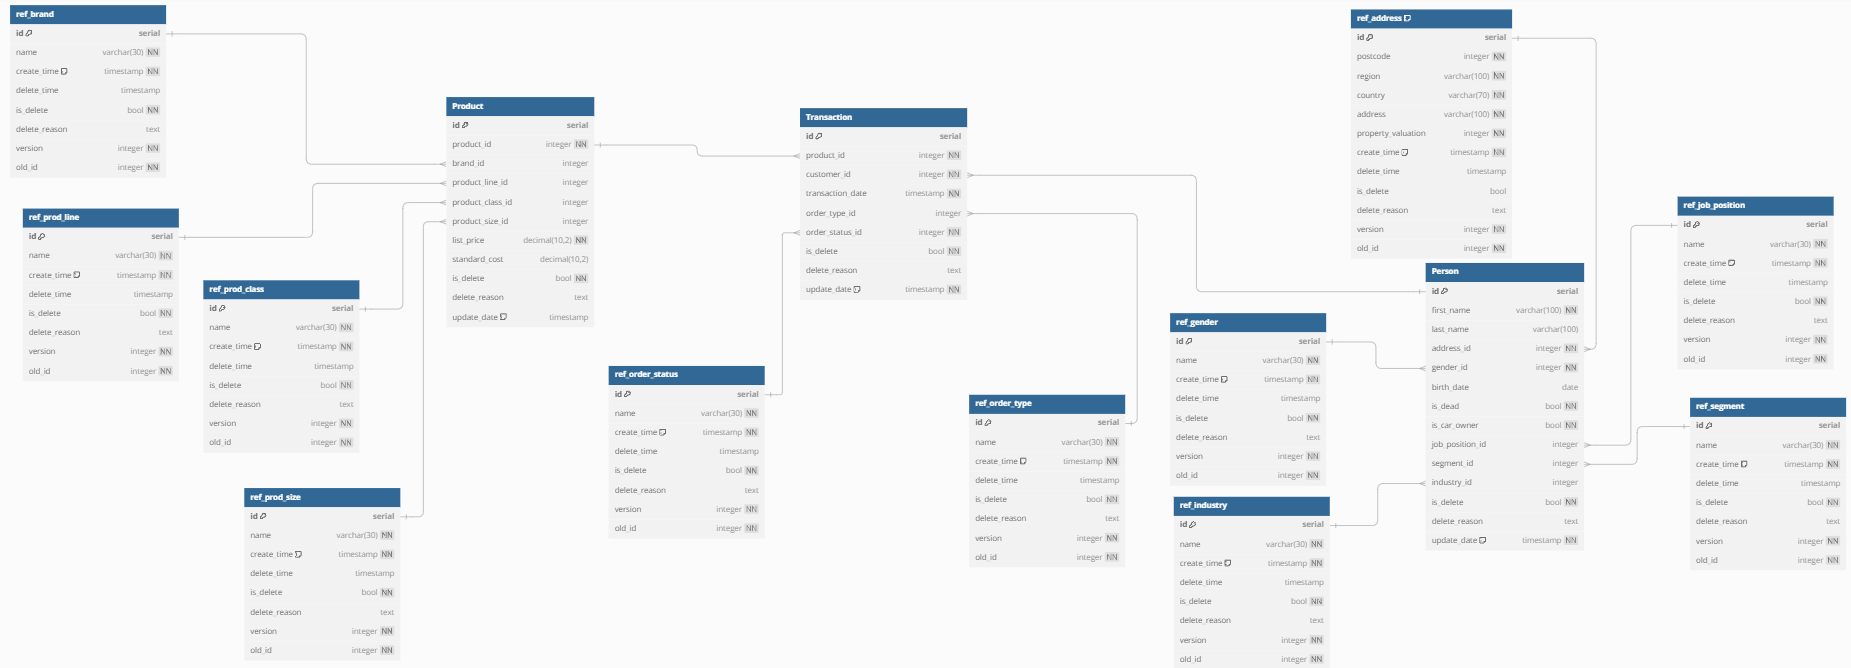

# Задание 2

Рассмотрим ситуацию, которая была первоначально

<table class="iksweb">
		<tr>
			<td>Нормальная форма</td>
			<td>Характеристика</td>
			<td>Описание: customers</td>
			<td>Наличие НФ: customers</td>
			<td>Описание: transactions</td>
			<td>Наличие НФ: transactions</td>
		</tr>
		<tr>
			<td rowspan="3">1</td>
			<td>Атомарность</td>
			<td>Все атрибуты</td>
			<td rowspan="3">✔️</td>
			<td>Все атрибутыы</td>
			<td rowspan="3">✔️</td>
		</tr>
		<tr>
			<td>Уникальный идентификатор</td>
			<td>PK: customer_id</td>
			<td>PK: transaction_id</td>
		</tr>
		<tr>
			<td>Отсуствие полных дубликатов строк</td>
			<td>Одна строка = одна тарнзакция</td>
			<td>Одна строка = одна тарнзакция</td>
		</tr>
		<tr>
			<td rowspan="2">2</td>
			<td>Зависимость от первичного ключа</td>
			<td>Все зависят от PK</td>
			<td rowspan="2">✔️</td>
			<td>Все зависят от PK</td>
			<td rowspan="2">✔️</td>
		</tr>
		<tr>
			<td>Отсутствие частичных зависимостей</td>
			<td>Отсутствуют, нет составных полей</td>
			<td>Отсутствуют, нет составных полей</td>
		</tr>
		<tr>
			<td>3</td>
			<td>Транзитивные зависимости</td>
			<td>postcode, state, country, address <br> могут зависеть друг от друга <br> (например, postcode → address</td>
			<td>❌</td>
			<td>brand, product_line, product_class, product_size, <br> list_price, product_id, <br> могут зависеть друг от друга
			 <br>(например, product_id → product_class)
			</td>
			<td>❌</td>
		</tr>
</table>

В новой структуре нормальные формы 1-3 присутствуют.

# Задание 3

Таблицы по смыслу можно разделить на основные и справочные. В справочных предсмотрено версионирование,логическое удаление данных. В основных дополнительно предусмотрено логирование изменений.

In [33]:
load_dotenv()

PGHOST = os.getenv("PGHOST")
PGDATABASE = os.getenv("PGDATABASE")
PGUSER = os.getenv("PGUSER")
PGPASSWORD = os.getenv("PGPASSWORD")

In [95]:
ddl = '''CREATE SCHEMA sales;

CREATE TABLE sales.product (
    id SERIAL PRIMARY KEY,
    product_id INTEGER NOT NULL,
    brand_id INTEGER,
    product_line_id INTEGER,
    product_class_id INTEGER,
    product_size_id INTEGER,
    list_price DECIMAL(10,2) NOT NULL,
    standard_cost DECIMAL(10,2),
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    update_date TIMESTAMP DEFAULT NOW()
);

CREATE TABLE sales.person (
    id SERIAL PRIMARY KEY,
    first_name VARCHAR(100) NOT NULL,
    last_name VARCHAR(100),
    address_id INTEGER NOT NULL,
    gender_id INTEGER NOT NULL,
    birth_date DATE,
    is_dead BOOLEAN NOT NULL,
    is_car_owner BOOLEAN NOT NULL,
    job_position_id INTEGER,
    segment_id INTEGER,
    industry_id INTEGER,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    update_date TIMESTAMP NOT NULL DEFAULT NOW()
);

CREATE TABLE sales.transaction (
    id SERIAL PRIMARY KEY,
    product_id INTEGER REFERENCES sales.product(id) NOT NULL,
    customer_id INTEGER NOT NULL,
    transaction_date TIMESTAMP NOT NULL,
    order_type_id INTEGER,
    order_status_id INTEGER NOT NULL,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    update_date TIMESTAMP NOT NULL DEFAULT NOW()
);

CREATE SCHEMA ref;

CREATE TABLE ref.ref_address (
    id SERIAL PRIMARY KEY,
    postcode INTEGER NOT NULL,
    region VARCHAR(100) NOT NULL,
    country VARCHAR(70) NOT NULL,
    address VARCHAR(100) NOT NULL,
    property_valuation INTEGER NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL,
    CONSTRAINT address_book UNIQUE (postcode, country, region, address, version, old_id)
);

CREATE TABLE ref.ref_prod_line (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_prod_class (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_prod_size (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_gender (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_job_position (
    id SERIAL PRIMARY KEY,
    name VARCHAR(130) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_segment (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_industry (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_order_type (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_order_status (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

CREATE TABLE ref.ref_brand (
    id SERIAL PRIMARY KEY,
    name VARCHAR(30) NOT NULL,
    create_time TIMESTAMP NOT NULL DEFAULT NOW(),
    delete_time TIMESTAMP,
    is_delete BOOLEAN NOT NULL,
    delete_reason TEXT,
    version INTEGER NOT NULL,
    old_id INTEGER NOT NULL
);

ALTER TABLE sales.transaction
    ADD CONSTRAINT fk_customer_id
    FOREIGN KEY (customer_id)
    REFERENCES sales.person (id);

ALTER TABLE sales.transaction
    ADD CONSTRAINT fk_order_type_id
    FOREIGN KEY (order_type_id)
    REFERENCES ref.ref_order_type (id);

ALTER TABLE sales.transaction
    ADD CONSTRAINT fk_order_status_id
    FOREIGN KEY (order_status_id)
    REFERENCES ref.ref_order_status (id);

ALTER TABLE sales.product
     ADD CONSTRAINT fk_product_line_id
    FOREIGN KEY (product_line_id)
    REFERENCES ref.ref_prod_line (id);

ALTER TABLE sales.product
    ADD CONSTRAINT fk_product_class_id
    FOREIGN KEY (product_class_id)
    REFERENCES ref.ref_prod_class (id);

ALTER TABLE sales.product
    ADD CONSTRAINT fk_brand_id
    FOREIGN KEY (brand_id)
    REFERENCES ref.ref_brand(id);

ALTER TABLE sales.product
    ADD CONSTRAINT fk_product_size_id
    FOREIGN KEY (product_size_id)
    REFERENCES ref.ref_prod_size (id);

ALTER TABLE sales.person
    ADD CONSTRAINT fk_gender_id
    FOREIGN KEY (gender_id)
    REFERENCES ref.ref_gender (id);

ALTER TABLE sales.person
    ADD CONSTRAINT fk_address_id
    FOREIGN KEY (address_id)
    REFERENCES ref.ref_address (id);

ALTER TABLE sales.person
     ADD CONSTRAINT fk_job_position_id
    FOREIGN KEY (job_position_id)
    REFERENCES ref.ref_job_position (id);

ALTER TABLE sales.person
    ADD CONSTRAINT fk_segment_id
    FOREIGN KEY (segment_id)
    REFERENCES ref.ref_segment (id);

ALTER TABLE sales.person
    ADD CONSTRAINT fk_industry_id
    FOREIGN KEY (industry_id)
    REFERENCES ref.ref_industry (id);
'''

In [96]:
dcl = f"""
CREATE USER select_user WITH PASSWORD '4a663cc5-e3c9-4f29-bc3b-c1436a59bef6';
GRANT CONNECT ON DATABASE {PGDATABASE} TO select_user;

GRANT USAGE ON SCHEMA ref TO select_user;
GRANT SELECT ON ALL TABLES IN SCHEMA ref TO select_user;

GRANT USAGE ON SCHEMA sales TO select_user;
GRANT SELECT ON ALL TABLES IN SCHEMA sales TO select_user;
"""


In [97]:
# Параметры подключения к PostgreSQL серверу
conn_params = {
    'dbname': PGDATABASE,  # Имя существующей базы данных
    'user': PGUSER,  # Ваше имя пользователя
    'password': PGPASSWORD,  # Ваш пароль
    'host': PGHOST,  # Хост (обычно localhost)
    'port': '5432'  # Порт (по умолчанию 5432)
}

# Создание подключения к базе данных
try:
    conn = psycopg2.connect(**conn_params)
    conn.autocommit = True  # Включение режима автокоммита для создания базы данных

    # Создание курсора для выполнения команд SQL
    cursor = conn.cursor()

    # Выполнение команды создания базы данных
    cursor.execute(ddl)
    cursor.execute(dcl)

    print(f"Все прошло успешно!")

except Exception as e:
    print(f"Произошла ошибка: {e}")

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Все прошло успешно!


# Задание 4: Сборка данных

In [47]:
current_datetime = datetime.now()

## Работа со справочниками

In [48]:
def create_standart_ref_table(name, create_time=current_datetime, delete_time=None, is_delete=False, delete_reason=None, version=1):
  data = pd.DataFrame()
  n = len(name)
  data['id'] = range(n)
  data['name'] = name
  data['create_time'] = [create_time] * n
  data['delete_time'] = [delete_time] * n
  data['is_delete'] = [is_delete] * n
  data['delete_reason'] = [delete_reason] * n
  data['version'] = [version] * n
  data['old_id'] = range(n)
  return data

In [49]:
ref_prod_line = create_standart_ref_table(transaction['product_line'].dropna().unique())
ref_prod_class = create_standart_ref_table(transaction['product_class'].dropna().unique())
ref_prod_size = create_standart_ref_table(transaction['product_size'].dropna().unique())
ref_order_type = create_standart_ref_table(['Offline', 'Online'])
ref_order_status = create_standart_ref_table(transaction['order_status'].dropna().unique())
ref_brand = create_standart_ref_table(transaction['brand'].dropna().unique())

ref_job_position = create_standart_ref_table(customer['job_title'].dropna().unique())
ref_segment = create_standart_ref_table(customer['wealth_segment'].dropna().unique())
ref_industry = create_standart_ref_table(customer['job_industry_category'].dropna().unique())

In [50]:
ref_gender = pd.DataFrame({
    'id': range(6),
    'name': customer['gender'].dropna().unique(),
    'create_time': [current_datetime] * 6,
    'is_delete': [False] * 6,
    'delete_reason': [None] * 6,
    'version': [2,1,1,2,1,2],
    'old_id': [2,1,2,3,2,1],
})

In [51]:
ref_address = pd.DataFrame()
ref_address[['id', 'postcode', 'region', 'country', 'address', 'property_valuation']] =customer[['postcode', 'state', 'country', 'address', 'property_valuation']].drop_duplicates().reset_index()
ref_address['create_time'] = current_datetime
ref_address['delete_time'] = None
ref_address['is_delete'] = False
ref_address['delete_reason'] = None
ref_address['version'] = 1
ref_address['old_id'] = ref_address['id']

## Работа с основными таблицами

In [52]:
#@title Таблица Product

product = pd.DataFrame()

product[['id', 'product_id', 'brand_id', 'product_line_id', 'product_class_id', 'product_size_id', 'list_price', 'standard_cost']] = transaction[['product_id',
             'brand',
             'product_line',
             'product_class',
             'product_size',
             'list_price',
             'standard_cost']].drop_duplicates().reset_index(drop=True).reset_index()
product['is_delete'] = False
product['delete_reason'] = None
product['update_date'] = current_datetime

rb = dict(zip(ref_brand['name'], ref_brand['id']))
product['brand_id'] = product['brand_id'].map(rb)

rb = dict(zip(ref_prod_line['name'], ref_prod_line['id']))
product['product_line_id'] = product['product_line_id'].map(rb)

rb = dict(zip(ref_prod_class['name'], ref_prod_class['id']))
product['product_class_id'] = product['product_class_id'].map(rb)

rb = dict(zip(ref_prod_size['name'], ref_prod_size['id']))
product['product_size_id'] = product['product_size_id'].map(rb)

product.head(3)

,id,product_id,brand_id,product_line_id,product_class_id,product_size_id,list_price,standard_cost,is_delete,delete_reason,update_date
0,0,2,0.0,0.0,0.0,0.0,71.49,53.62,False,None,2025-02-07 16:35:01.291036
1,1,3,1.0,0.0,0.0,1.0,2091.47,388.92,False,None,2025-02-07 16:35:01.291036
2,2,37,2.0,0.0,1.0,0.0,1793.43,248.82,False,None,2025-02-07 16:35:01.291036


In [53]:
#@title Таблица Transaction

trans = pd.DataFrame()
trans[['id', 'product_id', 'customer_id', 'transaction_date', 'order_type_id', 'order_status_id']] = transaction[['transaction_id',
                             'product_id',
                             'customer_id',
                             'transaction_date',
                             'online_order',
                             'order_status']]
trans['is_delete'] = False
trans['delete_reason'] = None
trans['update_date'] = current_datetime

rb = dict(zip([False, True], [0, 1]))
trans['order_type_id'] = trans['order_type_id'].map(rb)

rb = dict(zip(ref_order_status['name'], ref_order_status['id']))
trans['order_status_id'] = trans['order_status_id'].map(rb)

trans.head(3)

,id,product_id,customer_id,transaction_date,order_type_id,order_status_id,is_delete,delete_reason,update_date
0,1,2,2950,2017-02-25,0.0,0,False,None,2025-02-07 16:35:01.291036
1,2,3,3120,2017-05-21,1.0,0,False,None,2025-02-07 16:35:01.291036
2,3,37,402,2017-10-16,0.0,0,False,None,2025-02-07 16:35:01.291036


In [89]:
#@title Таблица Person

cust = pd.DataFrame()

cust[['id', 'first_name', 'last_name', 'postcode','region',
       'country','address', 'property_valuation', 'gender_id', 'birth_date', 'is_dead',
       'is_car_owner', 'job_position_id', 'segment_id', 'industry_id']] = customer[['customer_id',
          'first_name',
          'last_name',
          'postcode',
          'state',
          'country',
          'address',
          'property_valuation',
          'gender',
          'DOB',
          'deceased_indicator',
          'owns_car',
          'job_title',
          'wealth_segment',
          'job_industry_category'
          ]].drop_duplicates().reset_index(drop=True)

rb = dict(zip(ref_gender['name'], ref_gender['id']))
cust['gender_id'] = cust['gender_id'].map(rb)

rb = dict(zip(['N', 'Y'], [False, True]))
cust['is_dead'] = cust['is_dead'].map(rb)

rb = dict(zip(['No', 'Yes'], [False, True]))
cust['is_car_owner'] = cust['is_car_owner'].map(rb)
# --
rb = dict(zip(ref_job_position['name'], ref_job_position['id']))
cust['job_position_id'] = cust['job_position_id'].map(rb)

rb = dict(zip(ref_segment['name'], ref_segment['id']))
cust['segment_id'] = cust['segment_id'].map(rb)

rb = dict(zip(ref_industry['name'], ref_industry['id']))
cust['industry_id'] = cust['industry_id'].map(rb)

cust = cust.merge(ref_address[['id', 'postcode', 'region', 'country', 'address', 'property_valuation']],
                          on = ['postcode', 'region', 'country', 'address', 'property_valuation'],
                          how='left')

cust = cust.drop(columns=['postcode', 'region', 'country', 'address', 'property_valuation'])
cust.rename(columns={'id_x': 'id', 'id_y': 'address_id'}, inplace=True)

cust = cust[['id', 'first_name', 'last_name', 'address_id', 'gender_id', 'birth_date', 'is_dead',
       'is_car_owner', 'job_position_id', 'segment_id', 'industry_id']]

cust['is_delete'] = False
cust['delete_reason'] = None
cust['update_date'] = current_datetime

cust.head(3)

,id,first_name,last_name,address_id,gender_id,birth_date,is_dead,is_car_owner,job_position_id,segment_id,industry_id,is_delete,delete_reason,update_date
0,1,Laraine,Medendorp,0,0,1953-10-12 00:00:00,False,True,0.0,0,0.0,False,None,2025-02-07 16:35:01.291036
1,2,Eli,Bockman,1,1,1980-12-16 00:00:00,False,True,1.0,0,1.0,False,None,2025-02-07 16:35:01.291036
2,3,Arlin,Dearle,2,1,1954-01-20 00:00:00,False,True,2.0,0,2.0,False,None,2025-02-07 16:35:01.291036


## Загрузка данных

In [98]:
# Подключение к базе данных
engine = create_engine(f'postgresql://{PGUSER}:{PGPASSWORD}@{PGHOST}/{PGDATABASE}')

ref_prod_line.to_sql('ref_prod_line', engine, schema='ref', if_exists='append', index=False)    #1

4

In [99]:
ref_prod_class.to_sql('ref_prod_class', engine, schema='ref', if_exists='append', index=False)      #2

3

In [100]:
ref_prod_size.to_sql('ref_prod_size', engine, schema='ref', if_exists='append', index=False)        #3

3

In [101]:
ref_order_type.to_sql('ref_order_type', engine, schema='ref', if_exists='append', index=False)      #4

2

In [102]:
ref_order_status.to_sql('ref_order_status', engine, schema='ref', if_exists='append', index=False)  #5

2

In [103]:
ref_brand.to_sql('ref_brand', engine, schema='ref', if_exists='append', index=False)                #6

6

In [104]:
ref_job_position.to_sql('ref_job_position', engine, schema='ref', if_exists='append', index=False)  #7

195

In [105]:
ref_segment.to_sql('ref_segment', engine, schema='ref', if_exists='append', index=False)            #8

3

In [106]:
ref_industry.to_sql('ref_industry', engine, schema='ref', if_exists='append', index=False)          #9

9

In [107]:
ref_address.to_sql('ref_address', engine, schema='ref', if_exists='append', index=False)            #10

1000

In [108]:
ref_gender.to_sql('ref_gender', engine, schema='ref', if_exists='append', index=False)              #11

6

In [109]:
product.to_sql('product', engine, schema='sales', if_exists='append', index=False)              #12

399

In [110]:
cust.to_sql('person', engine, schema='sales', if_exists='append',chunksize=4000, index=False)                #13

1000

In [114]:
trans.sort_values(by=['customer_id', 'product_id']).iloc[:1000].to_sql('transaction', engine, schema='sales', if_exists='append', index=False)            #14

1000

# Проверка в интерфейсе


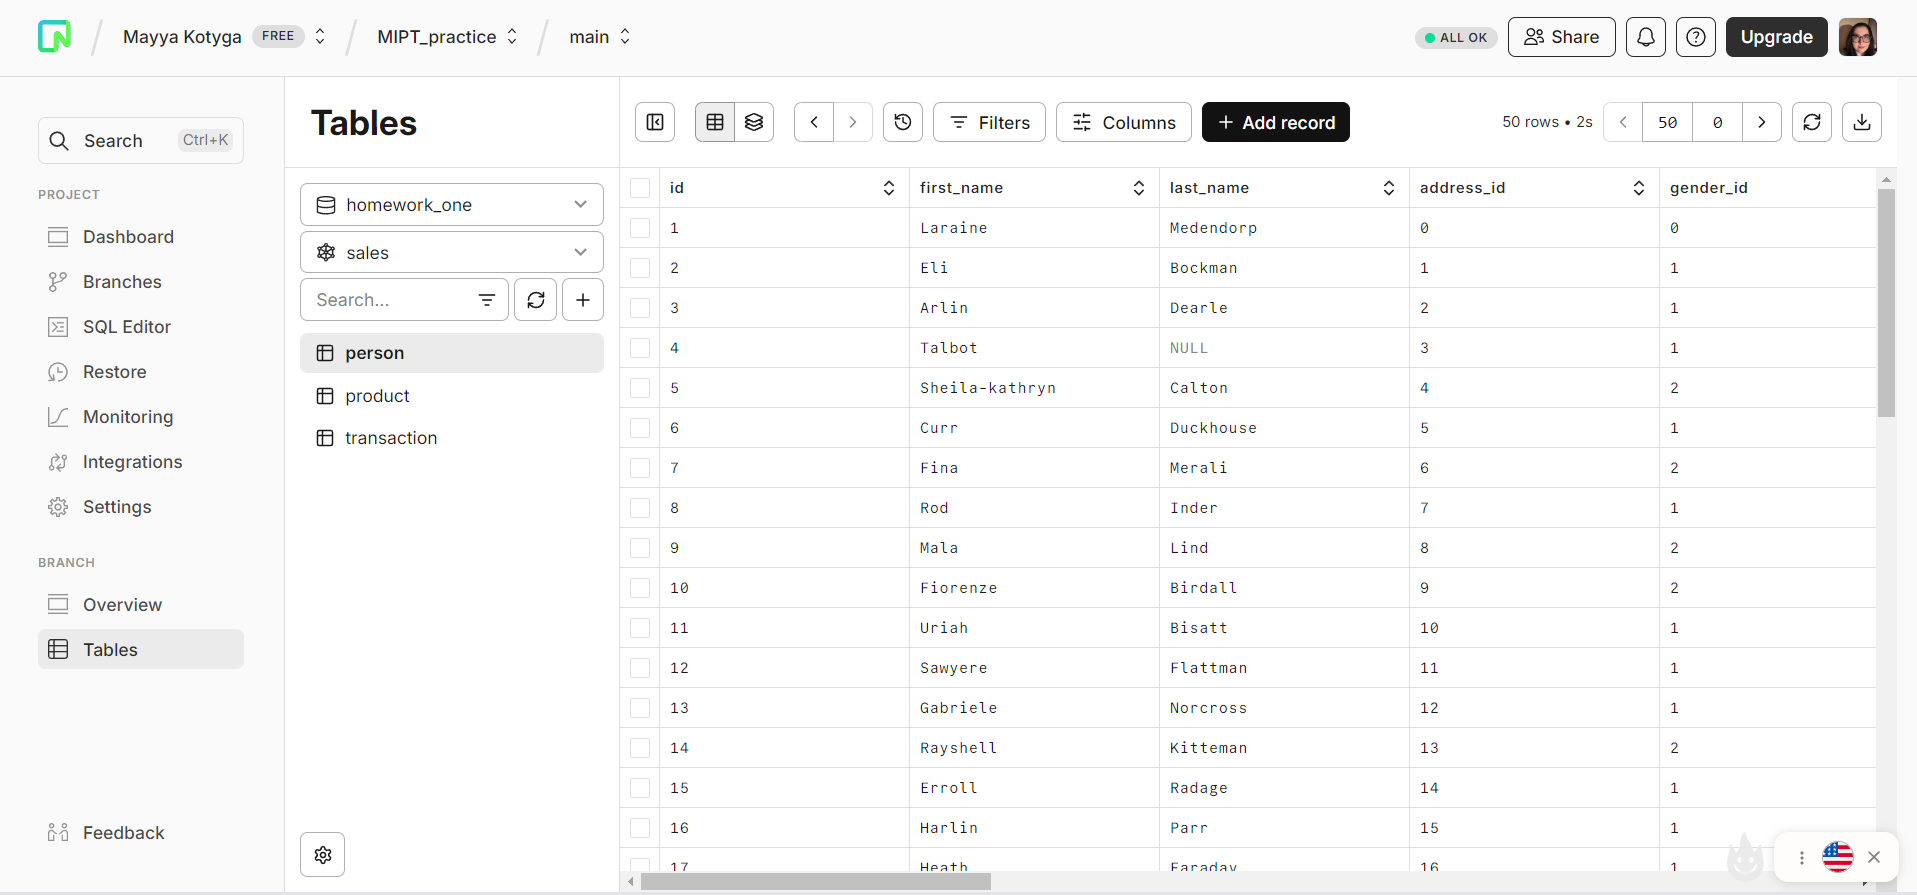

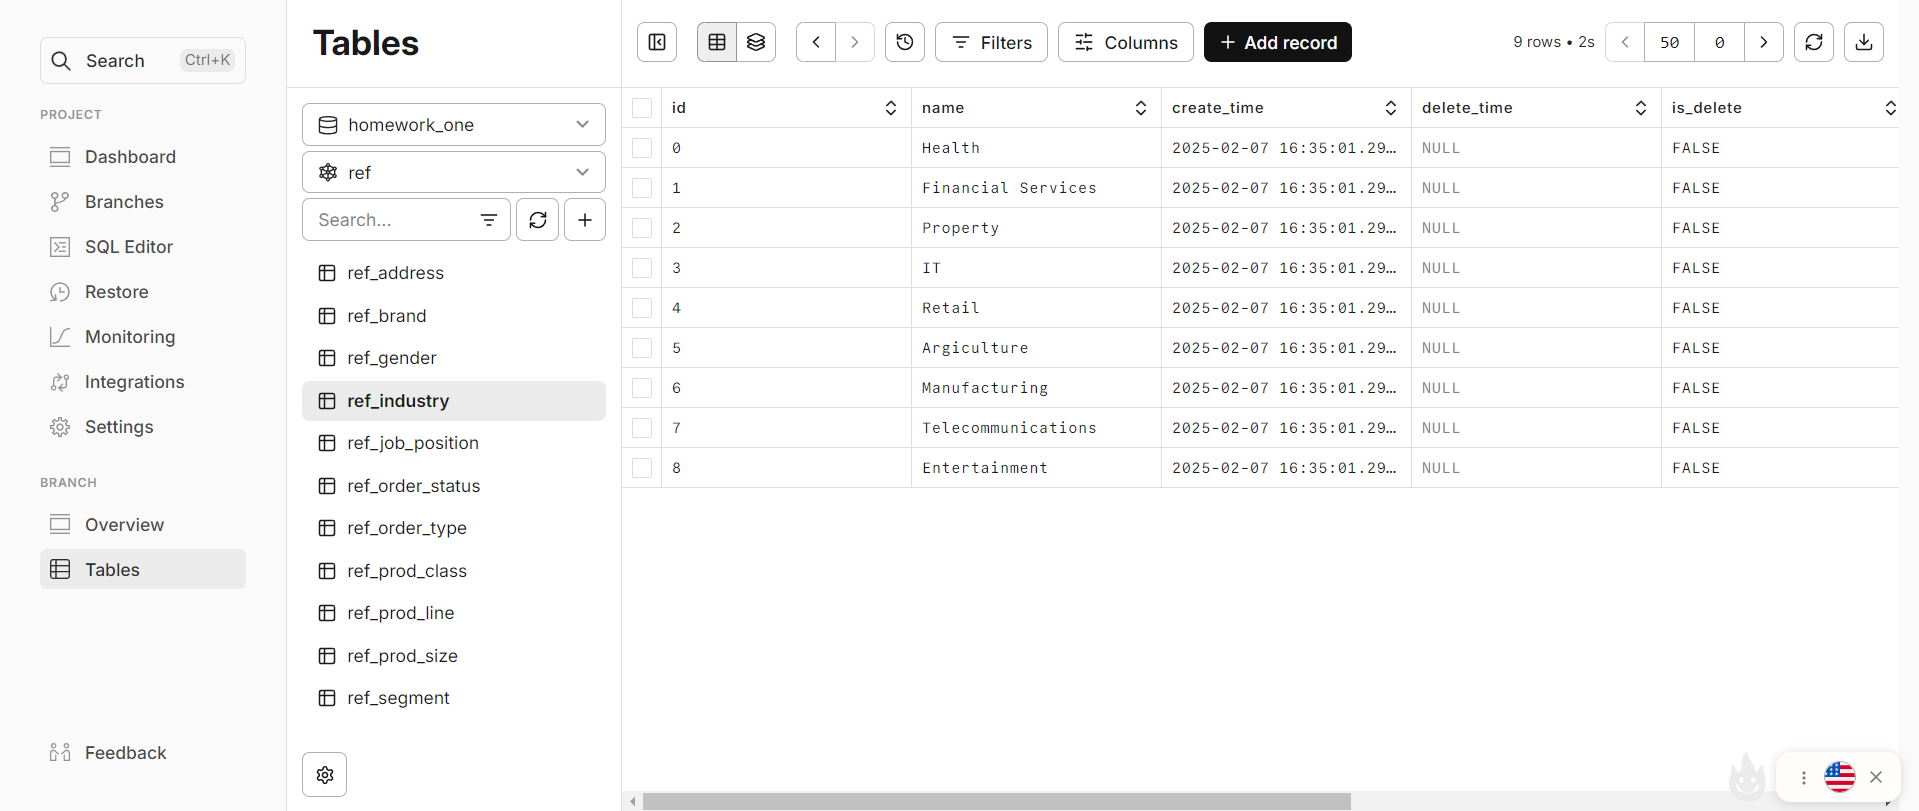

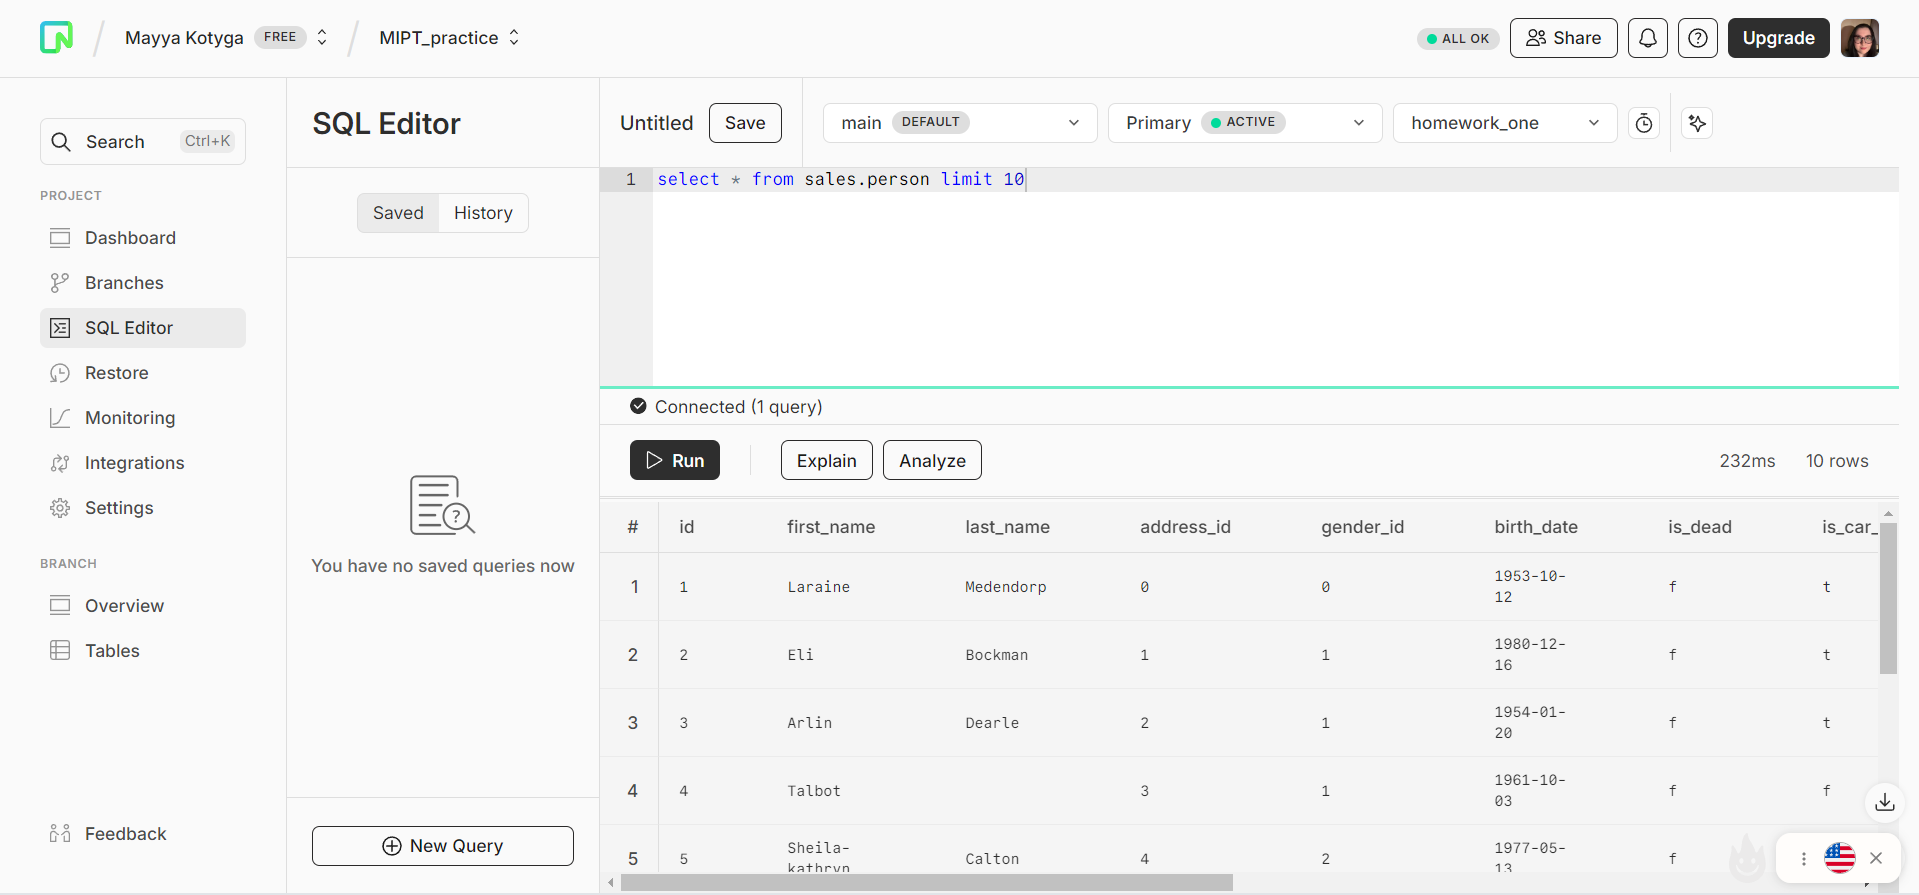

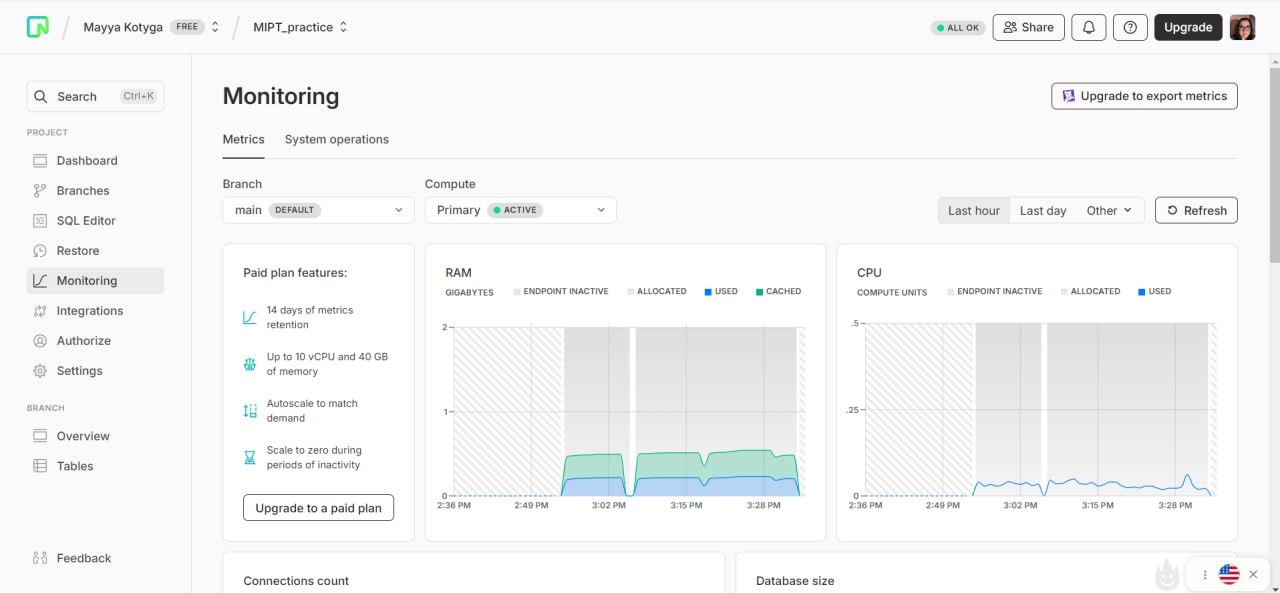

Всё загрузилось успешно!